In [1]:
import tensorflow as  tf
from tensorflow import keras
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D,Dropout,MaxPooling1D,Activation,Flatten,Dense


In [2]:
test_path=os.path.join(os.getcwd(),"rawdata")

In [3]:
ipd.Audio(os.path.join(test_path,os.listdir(test_path)[0]))

In [4]:
data=os.listdir(test_path)

In [5]:
feeling_list=[]
for item in data:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append([item,'female_calm'])
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append([item,'male_calm'])
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append([item,'female_happy'])
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append([item,'male_happy'])
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append([item,'female_sad'])
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append([item,'male_sad'])
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append([item,'female_angry'])
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append([item,'male_angry'])

In [6]:
df = pd.DataFrame(columns=['features'])
count=0
for name,feeling in feeling_list:
    full_path=os.path.join(test_path,name)
    X, sample_rate = librosa.load(full_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
    features = mfccs
    df.loc[count] = [features]
    count=count+1

In [7]:
sample_rate

array(44100)

In [8]:
df_final = pd.DataFrame(df['features'].values.tolist())
df_final["feeling"]=np.array(feeling_list)[:,1]


In [9]:
df_final_S=shuffle(df_final)

In [10]:
df_final_S.isnull().sum()

0          0
1          0
2          0
3          0
4          0
          ..
212        1
213        1
214        1
215        1
feeling    0
Length: 217, dtype: int64

In [11]:
df_processed=df_final_S.fillna(value=0)

In [12]:
Le=LabelEncoder()
df_processed["feeling"]=Le.fit_transform(df_processed["feeling"])

<AxesSubplot:>

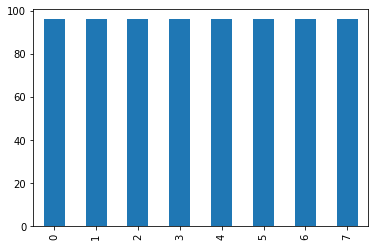

In [13]:
df_processed["feeling"].value_counts().plot.bar()

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(df_processed.iloc[:,:-1],df_processed.iloc[:,-1], test_size=0.33, random_state=42)

In [15]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,feeling
0,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,-70.267769,...,-57.447464,-58.896500,-58.750996,-57.405678,-60.078484,-63.426800,-62.638542,-61.082741,-60.234661,male_calm
1,-65.707649,-65.707649,-63.114719,-61.518997,-61.097141,-63.424599,-63.720066,-56.854614,-55.168972,-54.639999,...,-39.792141,-40.613159,-41.209202,-41.439201,-43.994286,-49.399620,-50.591599,-49.144051,-48.705654,female_calm
2,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,-65.482498,...,-31.346556,-34.310772,-35.800705,-35.936115,-37.631844,-40.119411,-41.662888,-41.323643,-40.710770,male_calm
3,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-64.528450,-65.928223,...,-48.674301,-48.596073,-47.602745,-43.049198,-42.659542,-43.188560,-44.001240,-43.610100,-44.698246,female_calm
4,-62.364311,-59.934727,-61.869602,-67.495773,-71.071808,-65.679817,-63.394402,-65.503349,-61.856644,-60.005428,...,-39.071327,-41.897121,-40.865437,-38.290604,-36.372398,-37.915779,-40.026127,-43.383774,-43.965401,male_calm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-48.035992,-48.035992,-48.035992,-48.035992,-48.035992,-48.035992,-48.035992,-47.938801,-47.644463,-47.549335,...,-48.035992,-48.035992,-48.035992,-48.035992,-48.035992,-48.035992,-48.035992,-48.035992,-48.035992,female_angry
764,-41.589390,-41.589390,-41.589390,-41.589390,-41.589390,-41.589390,-41.589390,-41.589390,-41.589390,-41.589390,...,-21.879768,-21.297997,-16.639414,-14.185689,-13.375396,-14.768592,-15.129277,-11.527274,-7.073745,male_angry
765,-49.118225,-49.171711,-48.633724,-48.457729,-48.155228,-48.165321,-47.880581,-48.698124,-48.548721,-47.591354,...,-33.466454,-33.984200,-33.900200,-33.247349,-33.471287,-31.636898,-30.704500,-17.725355,-12.636759,female_angry
766,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,...,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,-40.622002,male_angry


In [16]:
X_train=np.expand_dims(X_train, axis=2)
X_test=np.expand_dims(X_test,axis=2)

In [17]:
model=keras.models.Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))


In [18]:
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [19]:
model.summary()
model.input

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          1536      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_1 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)           8

<KerasTensor: shape=(None, 216, 1) dtype=float32 (created by layer 'conv1d_input')>

In [20]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=opt,metrics=['accuracy'])


In [22]:
cnnhistory=model.fit(X_train, y_train, batch_size=16, epochs=700, validation_data=(X_test, y_test))


Epoch 1/700
33/33 [==============================] - 3s 58ms/step - loss: 2.2920 - accuracy: 0.0739 - val_loss: 2.1531 - val_accuracy: 0.1024
Epoch 2/700
33/33 [==============================] - 1s 45ms/step - loss: 2.1406 - accuracy: 0.1473 - val_loss: 2.1428 - val_accuracy: 0.0827
Epoch 3/700
33/33 [==============================] - 2s 72ms/step - loss: 2.1139 - accuracy: 0.1065 - val_loss: 2.1096 - val_accuracy: 0.1102
Epoch 4/700
33/33 [==============================] - 3s 85ms/step - loss: 2.1043 - accuracy: 0.1689 - val_loss: 2.0846 - val_accuracy: 0.1299
Epoch 5/700
33/33 [==============================] - 3s 83ms/step - loss: 2.0627 - accuracy: 0.1776 - val_loss: 2.0837 - val_accuracy: 0.1024
Epoch 6/700
33/33 [==============================] - 3s 96ms/step - loss: 2.0581 - accuracy: 0.1476 - val_loss: 2.0619 - val_accuracy: 0.1496
Epoch 7/700
33/33 [==============================] - 4s 117ms/step - loss: 2.0237 - accuracy: 0.1911 - val_loss: 2.0780 - val_accuracy: 0.1417
Epoch

KeyboardInterrupt: 

<AxesSubplot:>

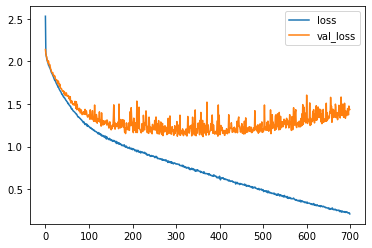

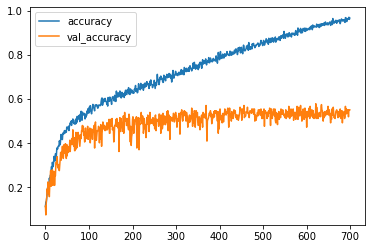

In [178]:
# pd.DataFrame(cnnhistory.history["loss","val_loss"]).plot()
pd.DataFrame(cnnhistory.history)[["loss","val_loss"]].plot()
pd.DataFrame(cnnhistory.history)[["accuracy","val_accuracy"]].plot()

In [68]:
X_train.shape

(514, 216, 1)

In [21]:
Le.classes_

array(['female_angry', 'female_calm', 'female_happy', 'female_sad',
       'male_angry', 'male_calm', 'male_happy', 'male_sad'], dtype=object)

In [103]:
X_train.shape

(514, 216, 1)

In [111]:
model

(254, 216, 1)

In [114]:
model.input_shape

(None, 216, 1)

In [123]:
pred=model.predict_classes(X_test)

In [120]:
y_test

18     5
591    0
338    6
657    0
466    7
      ..
747    0
159    1
270    6
293    2
158    5
Name: feeling, Length: 254, dtype: int32

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [140]:
confusion_matrix(y_test,pred,labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[19,  2,  2,  1,  2,  1,  3,  1],
       [ 1, 19,  5,  5,  0,  2,  0,  3],
       [ 6,  2, 16,  4,  0,  0,  0,  1],
       [ 5,  7,  5, 12,  0,  0,  0,  3],
       [ 1,  0,  0,  0, 34,  0,  2,  0],
       [ 0,  1,  0,  0,  2, 15,  5,  7],
       [ 1,  0,  0,  0,  7,  2, 11,  3],
       [ 1,  0,  0,  0,  5,  5, 11, 14]], dtype=int64)

In [139]:
[i for i in range(8)]

[0, 1, 2, 3, 4, 5, 6, 7]

In [134]:
pred

array([1, 4, 4, 6, 4, 3, 2, 1, 0, 5, 6, 7, 0, 0, 4, 7, 6, 4, 0, 1, 7, 7,
       1, 7, 3, 3, 4, 4, 4, 6, 5, 4, 7, 4, 7, 6, 6, 2, 7, 1, 0, 1, 5, 0,
       4, 4, 0, 1, 0, 4, 2, 0, 5, 2, 2, 6, 6, 6, 6, 4, 2, 0, 5, 4, 7, 5,
       7, 6, 7, 3, 4, 7, 1, 2, 6, 7, 6, 1, 1, 6, 4, 0, 0, 7, 3, 7, 5, 4,
       6, 4, 3, 7, 4, 4, 0, 1, 5, 6, 3, 1, 0, 4, 4, 3, 3, 3, 3, 4, 3, 4,
       3, 0, 0, 2, 5, 4, 7, 6, 0, 2, 2, 0, 0, 1, 5, 7, 4, 1, 0, 0, 7, 2,
       4, 6, 3, 2, 4, 0, 4, 0, 6, 7, 4, 3, 6, 4, 4, 0, 7, 1, 1, 0, 2, 7,
       1, 4, 5, 5, 4, 1, 3, 5, 6, 0, 2, 4, 0, 7, 0, 5, 4, 1, 0, 2, 2, 5,
       2, 0, 4, 2, 4, 2, 1, 5, 5, 5, 1, 3, 6, 5, 6, 6, 4, 0, 7, 2, 1, 7,
       4, 4, 7, 6, 7, 2, 0, 1, 6, 6, 7, 7, 4, 0, 4, 2, 1, 5, 3, 6, 1, 4,
       5, 1, 7, 6, 6, 2, 2, 2, 4, 1, 6, 4, 7, 4, 4, 5, 4, 3, 3, 2, 2, 1,
       1, 7, 0, 5, 1, 3, 6, 2, 1, 5, 3, 5], dtype=int64)

In [143]:
t_model=keras.models.load_model(r"C:\Users\Sharath\Downloads\Emotion_Voice_Detection_Model (1).h5")

In [160]:
t_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 216, 128)          768       
_________________________________________________________________
activation_8 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 216, 128)          82048     
_________________________________________________________________
activation_9 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 27, 128)         

In [148]:
t_model.load_weights(r"C:\Users\Sharath\Downloads\Emotion_Voice_Detection_Model (1).h5")

In [149]:
for layer in t_model.layers:
    layer.trainable=False

In [158]:
last_layer=t_model.get_layer(index=15)

In [161]:
last_output=last_layer.output

In [162]:
x=keras.layers.Dense(8,activation="softmax")(last_output)

In [164]:
model2=keras.models.Model(t_model.input,x)

In [165]:
model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7_input (InputLayer)  [(None, 216, 1)]          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 216, 128)          768       
_________________________________________________________________
activation_8 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 216, 128)          82048     
_________________________________________________________________
activation_9 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)          

In [180]:
model23.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=opt,metrics=['accuracy'])

cnnhistory2=model2.fit(X_train, y_train, batch_size=16, epochs=700, validation_data=(X_test, y_test))


Epoch 1/700
33/33 [==============================] - 1s 23ms/step - loss: 5.5832 - accuracy: 0.1089 - val_loss: 4.0606 - val_accuracy: 0.1102
Epoch 2/700
33/33 [==============================] - 1s 17ms/step - loss: 4.5672 - accuracy: 0.1284 - val_loss: 3.5091 - val_accuracy: 0.1181
Epoch 3/700
33/33 [==============================] - 1s 18ms/step - loss: 4.0315 - accuracy: 0.1401 - val_loss: 3.2678 - val_accuracy: 0.1181
Epoch 4/700
33/33 [==============================] - 1s 16ms/step - loss: 3.8180 - accuracy: 0.1479 - val_loss: 3.0914 - val_accuracy: 0.1181
Epoch 5/700
33/33 [==============================] - 1s 18ms/step - loss: 3.6146 - accuracy: 0.1615 - val_loss: 2.9401 - val_accuracy: 0.1457
Epoch 6/700
33/33 [==============================] - 1s 16ms/step - loss: 3.4686 - accuracy: 0.1926 - val_loss: 2.7991 - val_accuracy: 0.1654
Epoch 7/700
33/33 [==============================] - 1s 17ms/step - loss: 3.3474 - accuracy: 0.1946 - val_loss: 2.6806 - val_accuracy: 0.1850
Epoch 

In [189]:
pd.DataFrame(Le.inverse_transform(model.predict_classes(X_test)))

,0
0,female_calm
1,male_angry
2,male_angry
3,male_happy
4,male_angry
...,...
249,female_happy
250,female_calm
251,male_calm
252,female_sad


In [190]:
pd.DataFrame(Le.inverse_transform((y_test)))

,0
0,male_calm
1,female_angry
2,male_happy
3,female_angry
4,male_sad
...,...
249,female_angry
250,female_calm
251,male_happy
252,female_happy


In [191]:
from sklearn.metrics import plot_confusion_matrix


In [202]:
# plot_confusion_matrix(model, X_test, y_test)

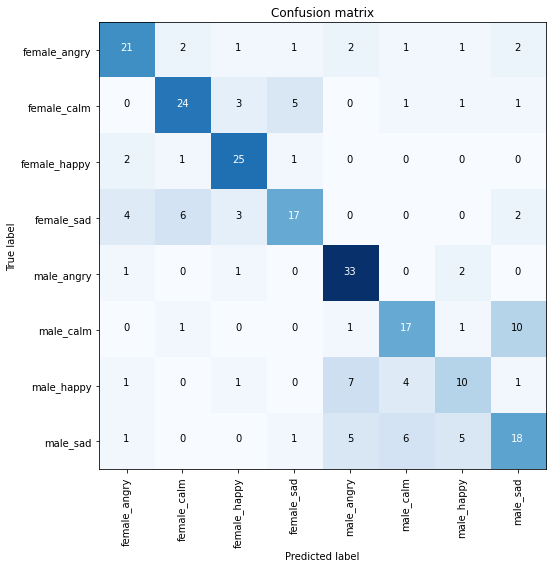

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = Le.classes_
normalize=False
figname = 'Confusion_matrix_concrete1.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.savefig(figname)

In [218]:

# y_pred = model.predict_classes(X_test)
# y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix( y_test,y_pred1)
plot_confusion_matrix(cm, classes = Le.classes_, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete2.jpg')

Confusion matrix, without normalization


In [210]:
y_pred1=np.argmax(model2.predict(X_test),axis=1)

In [213]:
confusion_matrix(y_test,y_pred1)

array([[21,  2,  1,  1,  2,  1,  1,  2],
       [ 0, 24,  3,  5,  0,  1,  1,  1],
       [ 2,  1, 25,  1,  0,  0,  0,  0],
       [ 4,  6,  3, 17,  0,  0,  0,  2],
       [ 1,  0,  1,  0, 33,  0,  2,  0],
       [ 0,  1,  0,  0,  1, 17,  1, 10],
       [ 1,  0,  1,  0,  7,  4, 10,  1],
       [ 1,  0,  0,  1,  5,  6,  5, 18]], dtype=int64)

In [224]:
print(classification_report(y_test,y_pred,target_names=Le.classes_))

              precision    recall  f1-score   support

female_angry       0.56      0.61      0.58        31
 female_calm       0.61      0.54      0.58        35
female_happy       0.57      0.55      0.56        29
  female_sad       0.55      0.38      0.44        32
  male_angry       0.68      0.92      0.78        37
   male_calm       0.60      0.50      0.55        30
  male_happy       0.34      0.46      0.39        24
    male_sad       0.44      0.39      0.41        36

    accuracy                           0.55       254
   macro avg       0.54      0.54      0.54       254
weighted avg       0.55      0.55      0.54       254



In [228]:
%load_ext tensorboard

In [264]:
Le.classes_

array(['female_angry', 'female_calm', 'female_happy', 'female_sad',
       'male_angry', 'male_calm', 'male_happy', 'male_sad'], dtype=object)